#### **(i) Number of Heads in Two Tosses of a Coin**
A fair coin has two outcomes: **Head (H) and Tail (T)**.  
If we toss a coin **two times**, the possible outcomes are:

$$
\{ HH, HT, TH, TT \}
$$

Now, let **X = Number of Heads**, then:

| **X (Heads)** | **Possible Outcomes** | **Probability** |
|--------------|----------------------|----------------|
| 0            | TT                   | $ \frac{1}{4} $ = 0.25 |
| 1            | HT, TH                | $ \frac{2}{4} $ = 0.50 |
| 2            | HH                    | $ \frac{1}{4} $ = 0.25 |

This follows a **Binomial Distribution**:  
$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$
where $ n = 2 $, $ p = 0.5 $, and $ k = 0,1,2 $.


#### **(ii) Number of Tails in Three Tosses of a Coin**
Possible outcomes for **three coin tosses**:

$$
\{ HHH, HHT, HTH, HTT, THH, THT, TTH, TTT \}
$$

Let **Y = Number of Tails**, then:

| **Y (Tails)** | **Possible Outcomes** | **Probability** |
|--------------|----------------------|----------------|
| 0            | HHH                   | $ \frac{1}{8} $ = 0.125 |
| 1            | HHT, HTH, THH          | $ \frac{3}{8} $ = 0.375 |
| 2            | HTT, THT, TTH          | $ \frac{3}{8} $ = 0.375 |
| 3            | TTT                    | $ \frac{1}{8} $ = 0.125 |

This is again a **Binomial Distribution** with $ n = 3 $, $ p = 0.5 $.


#### **(iii) Number of Heads in Four Tosses of a Coin**
For **four tosses**, possible outcomes:  
$$
\{ HHHH, HHHT, HHTH, HTHH, THHH, HHTT, HTHT, HTTH, THHT, THTH, TTHH, TTTH, TTHT, TTTH, TTTT \}
$$

Let **Z = Number of Heads**, then:

| **Z (Heads)** | **Possible Outcomes** | **Probability** |
|--------------|----------------------|----------------|
| 0            | TTTT                   | $ \frac{1}{16} $ = 0.0625 |
| 1            | HTTT, THTT, TTHT, TTTH  | $ \frac{4}{16} $ = 0.25 |
| 2            | HHTT, HTHT, HTTH, THHT, THTH, TTHH | $ \frac{6}{16} $ = 0.375 |
| 3            | HHHT, HHTH, HTHH, THHH  | $ \frac{4}{16} $ = 0.25 |
| 4            | HHHH                   | $ \frac{1}{16} $ = 0.0625 |

This follows a **Binomial Distribution** with $ n = 4 $, $ p = 0.5 $.



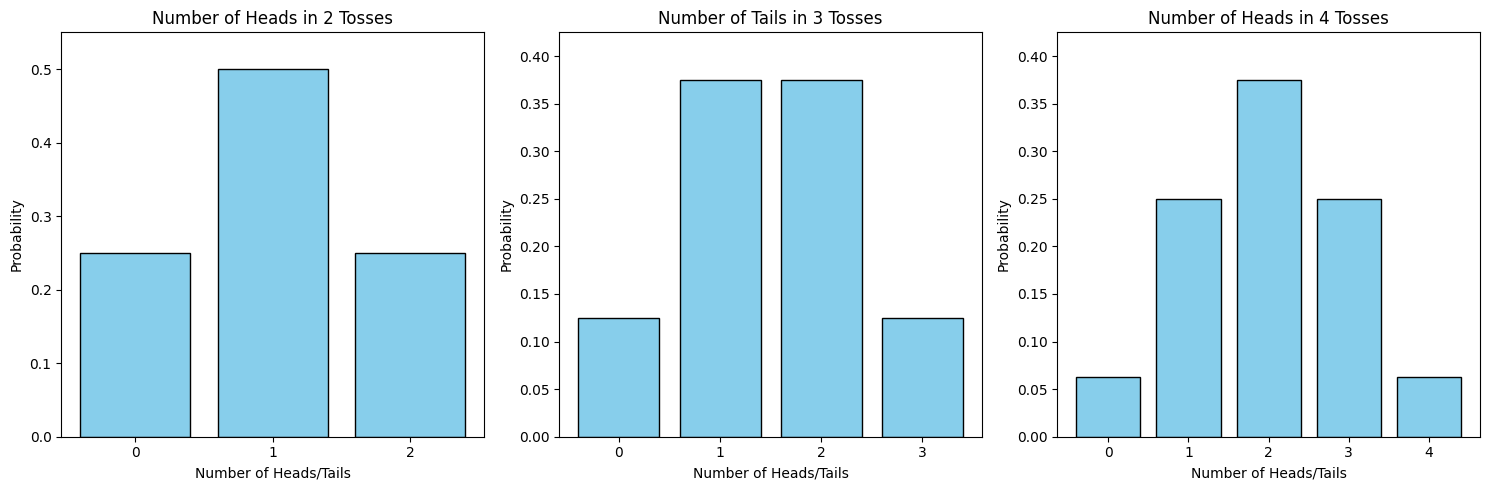

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Define the scenarios
scenarios = [
    {"n": 2, "title": "Number of Heads in 2 Tosses"},
    {"n": 3, "title": "Number of Tails in 3 Tosses"},
    {"n": 4, "title": "Number of Heads in 4 Tosses"}
]

# Set probability of getting Head or Tail
p = 0.5

# Plot each distribution
plt.figure(figsize=(15, 5))
for i, scenario in enumerate(scenarios, 1):
    n = scenario["n"]
    x = np.arange(0, n+1)  # Possible values of X
    y = binom.pmf(x, n, p)  # Binomial Probability Mass Function (PMF)
    
    plt.subplot(1, 3, i)
    plt.bar(x, y, color='skyblue', edgecolor='black')
    plt.xlabel("Number of Heads/Tails")
    plt.ylabel("Probability")
    plt.title(scenario["title"])
    plt.xticks(x)
    plt.ylim(0, max(y) + 0.05)

plt.tight_layout()
plt.show()

In [3]:
# %pip install sympy

In [4]:
import sympy as sp  

# Define the variable k  
k = sp.symbols('k')  

# Define the probabilities  
probabilities = [0, k, 2*k, 2*k, 3*k, k**2, 2*k**2, 7*k**2 + k]  

# Calculate the sum of the probabilities  
total_probability = sum(probabilities)  

# Set the equation for total probability equal to 1  
equation = sp.Eq(total_probability, 1)  

# Solve for k  
k_value = sp.solve(equation, k)[0]  

# Calculate probabilities based on the value of k  
P_X_less_than_3 = k_value + 2*k_value + 2*k_value  # P(X=1) + P(X=2) + P(X=3)  
P_X_greater_than_4 = k_value**2 + 2*k_value**2 + (7*k_value**2 + k_value)  # P(X=5) + P(X=6) + P(X=7)  

# Substitute k_value back into probabilities  
P_X_less_than_3_value = P_X_less_than_3.subs(k, k_value)  
P_X_greater_than_4_value = P_X_greater_than_4.subs(k, k_value)  

# Output results  
print(f"Value of k: {k_value.evalf()}")  
print(f"P(X < 3): {P_X_less_than_3_value.evalf()}")  
print(f"P(X > 4): {P_X_greater_than_4_value.evalf()}")

Value of k: -1.00000000000000
P(X < 3): -5.00000000000000
P(X > 4): 9.00000000000000
